In [1]:
import nltk
import string
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re

In [2]:
passage="Independence Day 2020: Top 10 quotes of PM Modi from his speech India’s freedom struggle became a challenge to forces of expansionism while attempts were made for hundreds of years by various rulers to root out India’s culture and traditions. The idea of expansionism led to the enslavement of many countries but even in the midst of fierce wars, India did not falter in its freedom struggle.Amid COVID-19 pandemic, 130 crore Indians took the resolve to be self-reliant and ‘Aatmanirbhar Bharat’ is on the mind of India. This dream is turning into a pledge. Aatmanirbhar Bharat has become a ‘mantra’ for the 130 cr Indians today. I am confident that India will realise this dream. I am confident of the abilities, confidence and potential of my fellow Indians. Once we decide to do something, we do not rest until we achieve that goal.I agree that there are lakhs of challenges for Aatmanirbhar Bharat and they increase if there is global competitiveness. However, if there are lakhs of challenges then the country also has power which gives crores of solutions, my countrymen who give us the strength of solutions.The mindset of free India should be ‘vocal for local’. We should appreciate our local products, if we don’t do this then our products will not get the opportunity to do better and will not get encouraged.Today, many big companies are turning towards India. We have to move forward with the mantra of ‘Make for world’ along with ‘Make in India’.Whenever women received opportunity, they made India proud & strengthened it. Today, the nation is determined to provide equal opportunities of self-employment & employment to them. Today women are working in coal mines, our daughters are touching the sky while flying fighter plane.This one year is a year of the new journey of development for Jammu and Kashmir. This one year is the year of the rights received by the women and the Dalits in Jammu and Kashmir. This one year is also the year of a life of dignity for the refugees in Jammu and Kashmir.From LoC to LAC, whoever tried to raise their eyes towards the sovereignty of our country, our soldiers responded to it in the same manner. The world saw what our forces can do to protect India’s sovereignty in Ladakh. Protecting our sovereignty is supreme for us.Today’s neighbour is not just the one with whom we share a border but also those with whom our heart stays connected, where there is harmony in relations. I am happy that in the past some time India has further strengthened its relations with all countries in its extended neighbourhood.Construction of a grand Ram Temple in Ayodhya started 10 days ago. Ramjanmbhoomi issue that prevailed for centuries, has been resolved peacefully.The conduct of people of the country has been unprecedented and is an inspiration for the future."

In [3]:
text_corpus=["Independence Day 2020: Top 10 quotes of PM Modi from his speech",
        "India’s freedom struggle became a challenge to forces of expansionism while attempts were made for hundreds of years by various rulers to root out India’s culture and traditions. The idea of expansionism led to the enslavement of many countries but even in the midst of fierce wars, India did not falter in its freedom struggle",
        "Amid COVID-19 pandemic, 130 crore Indians took the resolve to be self-reliant and ‘Aatmanirbhar Bharat’ is on the mind of India. This dream is turning into a pledge. Aatmanirbhar Bharat has become a ‘mantra’ for the 130 cr Indians today. I am confident that India will realise this dream. I am confident of the abilities, confidence and potential of my fellow Indians. Once we decide to do something, we do not rest until we achieve that goal",
        "I agree that there are lakhs of challenges for Aatmanirbhar Bharat and they increase if there is global competitiveness. However, if there are lakhs of challenges then the country also has power which gives crores of solutions, my countrymen who give us the strength of solutions",
        "The mindset of free India should be ‘vocal for local’. We should appreciate our local products, if we don’t do this then our products will not get the opportunity to do better and will not get encouraged",
        "Today,many big companies are turning towards India. We have to move forward with the mantra of ‘Make for world’ along with ‘Make in India’",
        "Whenever women received opportunity, they made India proud & strengthened it. Today, the nation is determined to provide equal opportunities of self-employment & employment to them. Today women are working in coal mines, our daughters are touching the sky while flying fighter plane",
        "This one year is a year of the new journey of development for Jammu and Kashmir. This one year is the year of the rights received by the women and the Dalits in Jammu and Kashmir. This one year is also the year of a life of dignity for the refugees in Jammu and Kashmir",
        "From LoC to LAC, whoever tried to raise their eyes towards the sovereignty of our country, our soldiers responded to it in the same manner. The world saw what our forces can do to protect India’s sovereignty in Ladakh. Protecting our sovereignty is supreme for us",
        "Today’s neighbour is not just the one with whom we share a border but also those with whom our heart stays connected, where there is harmony in relations. I am happy that in the past some time India has further strengthened its relations with all countries in its extended neighbourhood",
        "Construction of a grand Ram Temple in Ayodhya started 10 days ago. Ramjanmbhoomi issue that prevailed for centuries, has been resolved peacefully. The conduct of people of the country has been unprecedented and is an inspiration for the future."]

In [4]:
import pprint
stoplist = set('for a of the and to in'.split(' '))

# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict

frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)

[['10', 'from'],
 ['india’s',
  'freedom',
  'struggle',
  'forces',
  'expansionism',
  'while',
  'made',
  'by',
  'india’s',
  'expansionism',
  'countries',
  'but',
  'india',
  'not',
  'its',
  'freedom',
  'struggle'],
 ['130',
  'indians',
  'be',
  'is',
  'india.',
  'this',
  'is',
  'turning',
  'aatmanirbhar',
  'bharat',
  'has',
  '130',
  'indians',
  'i',
  'am',
  'confident',
  'that',
  'india',
  'will',
  'this',
  'i',
  'am',
  'confident',
  'my',
  'we',
  'do',
  'we',
  'do',
  'not',
  'we',
  'that'],
 ['i',
  'that',
  'there',
  'are',
  'lakhs',
  'challenges',
  'aatmanirbhar',
  'bharat',
  'they',
  'if',
  'there',
  'is',
  'if',
  'there',
  'are',
  'lakhs',
  'challenges',
  'then',
  'country',
  'also',
  'has',
  'my',
  'us'],
 ['india',
  'should',
  'be',
  'we',
  'should',
  'our',
  'if',
  'we',
  'do',
  'this',
  'then',
  'our',
  'will',
  'not',
  'get',
  'do',
  'will',
  'not',
  'get'],
 ['are',
  'turning',
  'towards',
  '

In [5]:
#creating a dictionary
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(60 unique tokens: ['10', 'from', 'but', 'by', 'countries']...)


In [6]:
# count of each word
pprint.pprint(dictionary.token2id)

{'&': 49,
 '10': 0,
 '130': 15,
 'aatmanirbhar': 16,
 'also': 33,
 'am': 17,
 'are': 34,
 'be': 18,
 'been': 59,
 'bharat': 19,
 'but': 2,
 'by': 3,
 'challenges': 35,
 'confident': 20,
 'countries': 4,
 'country': 36,
 'do': 21,
 'expansionism': 5,
 'forces': 6,
 'freedom': 7,
 'from': 1,
 'get': 43,
 'has': 22,
 'i': 23,
 'if': 37,
 'india': 8,
 'india.': 24,
 'indians': 25,
 'india’s': 9,
 'is': 26,
 'its': 10,
 'jammu': 53,
 'kashmir.': 54,
 'lakhs': 38,
 'made': 11,
 'my': 27,
 'not': 12,
 'one': 55,
 'our': 44,
 'received': 50,
 'should': 45,
 'sovereignty': 57,
 'strengthened': 51,
 'struggle': 13,
 'that': 28,
 'then': 39,
 'there': 40,
 'they': 41,
 'this': 29,
 'towards': 46,
 'turning': 30,
 'us': 42,
 'we': 31,
 'while': 14,
 'whom': 58,
 'will': 32,
 'with': 47,
 'women': 52,
 'year': 56,
 '‘make': 48}


In [7]:
text = re.sub(r'\[[0-9]*\]',' ',passage)
text = re.sub(r'\s+',' ',text)

text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)
cleaned_text = text.translate(str.maketrans('', '', string.punctuation))

In [8]:
sentences = nltk.sent_tokenize(cleaned_text)
sentences

['independence day  top quotes of pm modi from his speech india’s freedom struggle became a challenge to forces of expansionism while attempts were made for hundreds of years by various rulers to root out india’s culture and traditions the idea of expansionism led to the enslavement of many countries but even in the midst of fierce wars india did not falter in its freedom struggleamid covid pandemic crore indians took the resolve to be selfreliant and ‘aatmanirbhar bharat’ is on the mind of india this dream is turning into a pledge aatmanirbhar bharat has become a ‘mantra’ for the cr indians today i am confident that india will realise this dream i am confident of the abilities confidence and potential of my fellow indians once we decide to do something we do not rest until we achieve that goali agree that there are lakhs of challenges for aatmanirbhar bharat and they increase if there is global competitiveness however if there are lakhs of challenges then the country also has power wh

In [9]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [10]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [11]:
sent_word

[['independence',
  'day',
  'top',
  'quotes',
  'pm',
  'modi',
  'speech',
  'india',
  '’',
  'freedom',
  'struggle',
  'became',
  'challenge',
  'forces',
  'expansionism',
  'attempts',
  'made',
  'hundreds',
  'years',
  'various',
  'rulers',
  'root',
  'india',
  '’',
  'culture',
  'traditions',
  'idea',
  'expansionism',
  'led',
  'enslavement',
  'many',
  'countries',
  'even',
  'midst',
  'fierce',
  'wars',
  'india',
  'falter',
  'freedom',
  'struggleamid',
  'covid',
  'pandemic',
  'crore',
  'indians',
  'took',
  'resolve',
  'selfreliant',
  '‘',
  'aatmanirbhar',
  'bharat',
  '’',
  'mind',
  'india',
  'dream',
  'turning',
  'pledge',
  'aatmanirbhar',
  'bharat',
  'become',
  '‘',
  'mantra',
  '’',
  'cr',
  'indians',
  'today',
  'confident',
  'india',
  'realise',
  'dream',
  'confident',
  'abilities',
  'confidence',
  'potential',
  'fellow',
  'indians',
  'decide',
  'something',
  'rest',
  'achieve',
  'goali',
  'agree',
  'lakhs',
  'c

In [12]:
model = Word2Vec(sent_word, min_count=1)
words = model.wv.vocab

In [13]:
similar1 = model.wv.most_similar('struggle',topn=10)

similar1

[('stays', 0.2775598168373108),
 ('root', 0.2512335181236267),
 ('realise', 0.2377532422542572),
 ('bharat', 0.2103223353624344),
 ('future', 0.1987471580505371),
 ('loc', 0.1955789178609848),
 ('rest', 0.19519320130348206),
 ('development', 0.15697672963142395),
 ('appreciate', 0.14310741424560547),
 ('journey', 0.13749271631240845)]

In [14]:
similar2 = model.wv.most_similar('independence',topn=10)

similar2

[('get', 0.28833305835723877),
 ('falter', 0.23759469389915466),
 ('along', 0.2356264591217041),
 ('enslavement', 0.22353485226631165),
 ('world', 0.20448535680770874),
 ('give', 0.1859845668077469),
 ('prevailed', 0.1734398901462555),
 ('even', 0.1690245270729065),
 ('turning', 0.16381563246250153),
 ('confidence', 0.16282564401626587)]

In [15]:
similar3 = model.wv.most_similar('speech',topn=10)

similar3

[('working', 0.26271313428878784),
 ('daughters', 0.2612481713294983),
 ('resolved', 0.2079528570175171),
 ('stays', 0.20644795894622803),
 ('whoever', 0.2036675214767456),
 ('products', 0.19609880447387695),
 ('power', 0.17892491817474365),
 ('ayodhya', 0.1730756014585495),
 ('saw', 0.16958019137382507),
 ('made', 0.16560539603233337)]

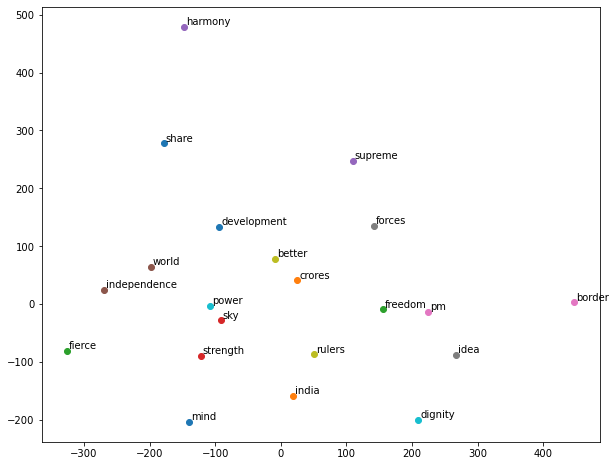

In [16]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import  TSNE
vocab = ['development','india','freedom','strength','harmony','world','border','forces','rulers','dignity','share','crores','fierce','sky','supreme','independence','pm','idea','better','power','mind']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)